Original Data Head from Iris.csv:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Target Labels (encoded): [0 1 2]
Original Target Names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Scaled Data (first 5 rows of training set):
[[0.22222222 0.20833333 0.32758621 0.41666667]
 [0.52777778 0.08333333 0.5862069  0.58333333]
 [0.22222222 0.75       0.06896552 0.08333333]
 [0.69444444 0.5        0.82758621 0.91666667]
 [0.38888889 0.33333333 0.51724138 0.5       ]]

--- Training KNN with K = 1 ---
Accuracy for K=1: 0.9333
Confusion Matrix for K=1:
[[15  0  0]
 [ 0 15  0]
 [ 0  3

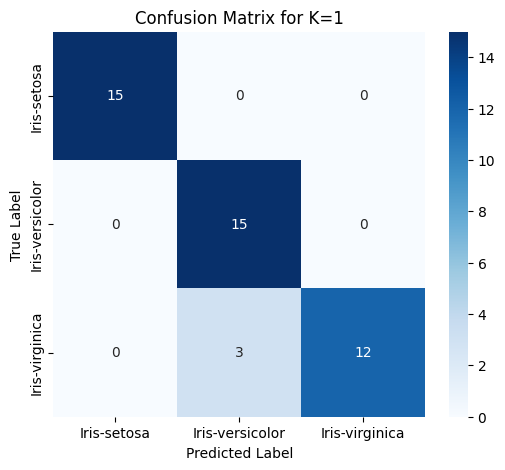


--- Training KNN with K = 3 ---
Accuracy for K=3: 0.9333
Confusion Matrix for K=3:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


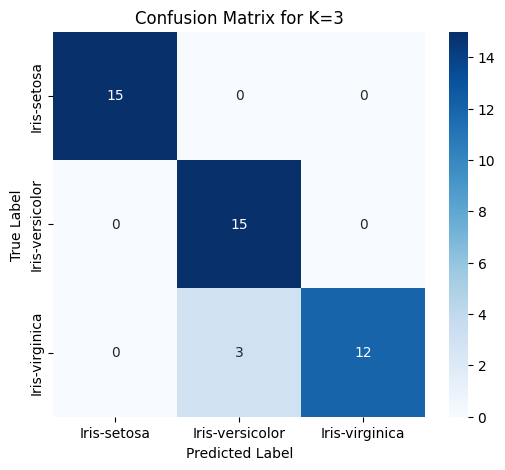


--- Training KNN with K = 5 ---
Accuracy for K=5: 0.9333
Confusion Matrix for K=5:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


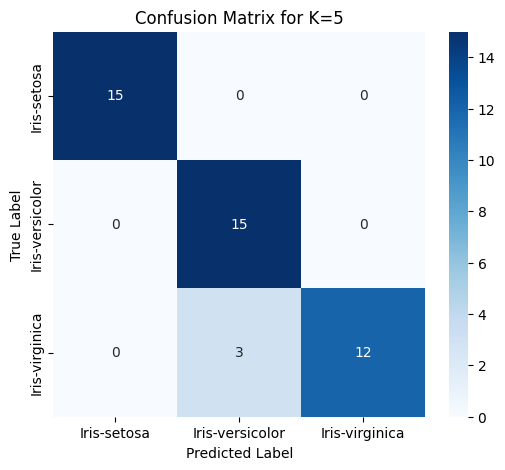


--- Training KNN with K = 7 ---
Accuracy for K=7: 0.9333
Confusion Matrix for K=7:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


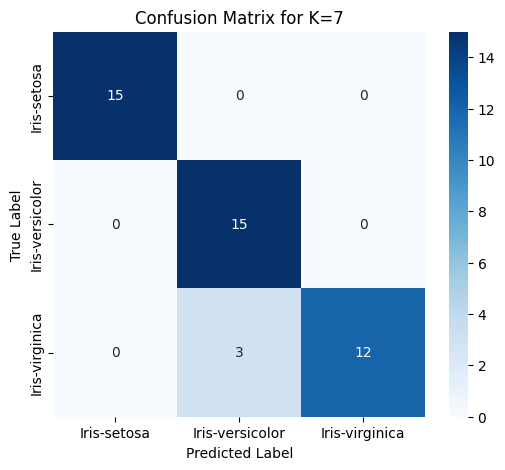


--- Training KNN with K = 9 ---
Accuracy for K=9: 0.9333
Confusion Matrix for K=9:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


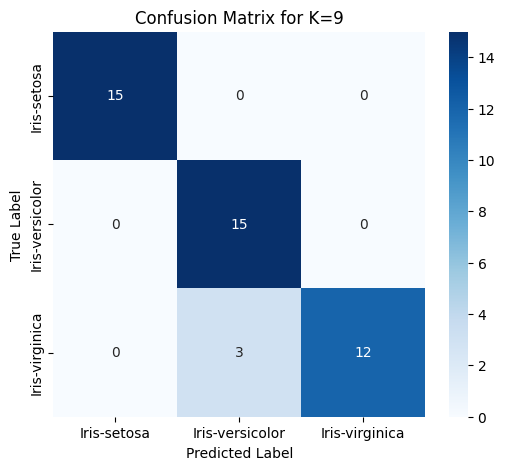


--- Training KNN with K = 11 ---
Accuracy for K=11: 0.9333
Confusion Matrix for K=11:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


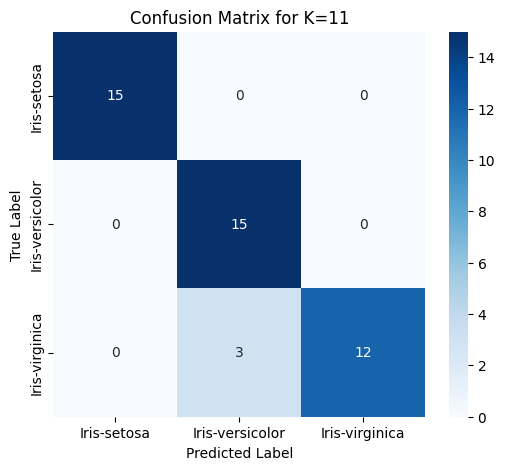


--- Training KNN with K = 13 ---
Accuracy for K=13: 0.9333
Confusion Matrix for K=13:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


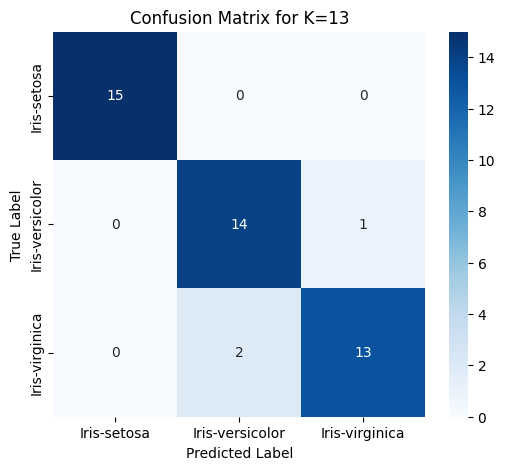


--- Training KNN with K = 15 ---
Accuracy for K=15: 0.9111
Confusion Matrix for K=15:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


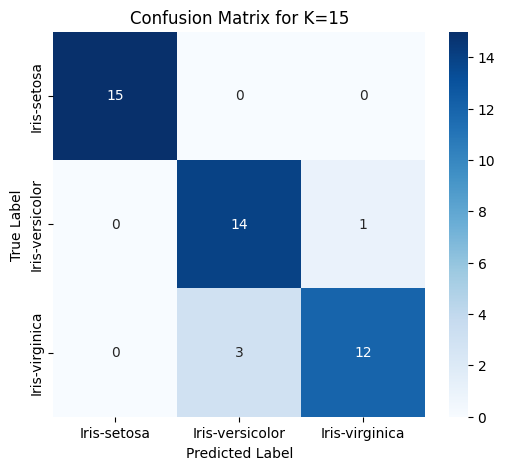


--- Training KNN with K = 17 ---
Accuracy for K=17: 0.9111
Confusion Matrix for K=17:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


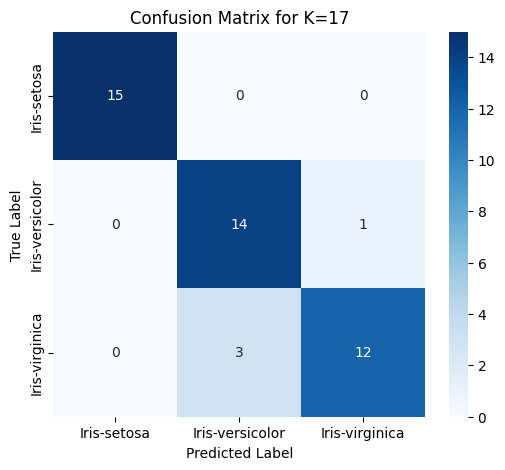


--- Training KNN with K = 19 ---
Accuracy for K=19: 0.9111
Confusion Matrix for K=19:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


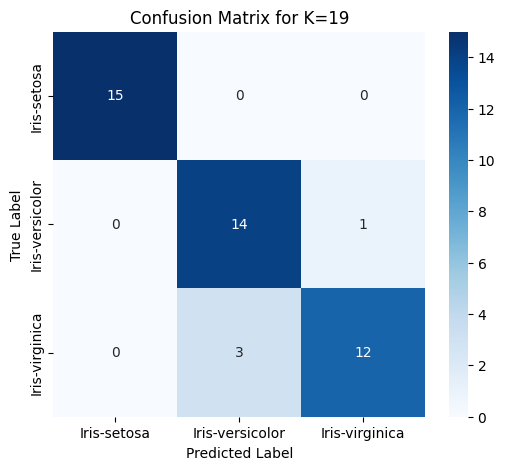

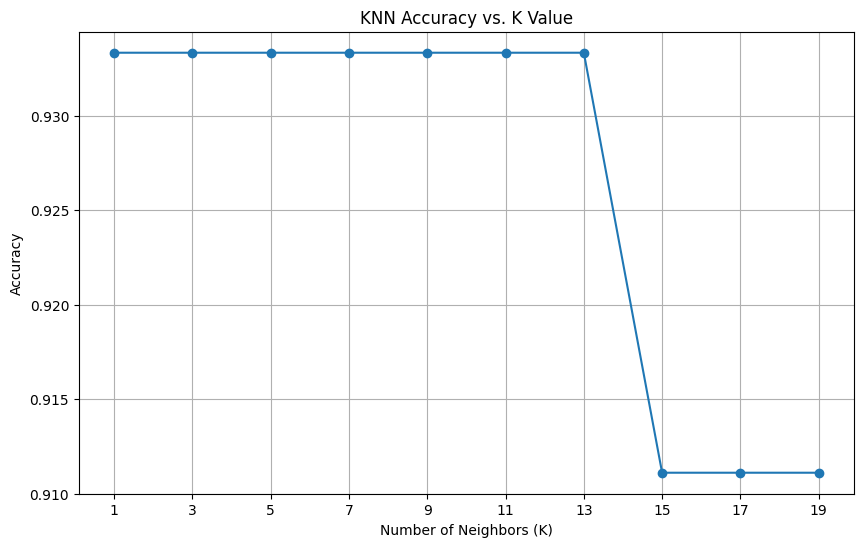


Optimal K based on accuracy plot: 1


C:\Users\yuvan\AppData\Local\Temp\ipykernel_15368\1552010759.py:131: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2_f_scaled[:, 0], X_test_2_f_scaled[:, 1], c=y_test_2_f, marker='x', s=50, edgecolor='k', cmap=plt.cm.RdYlBu, label='Test Data')


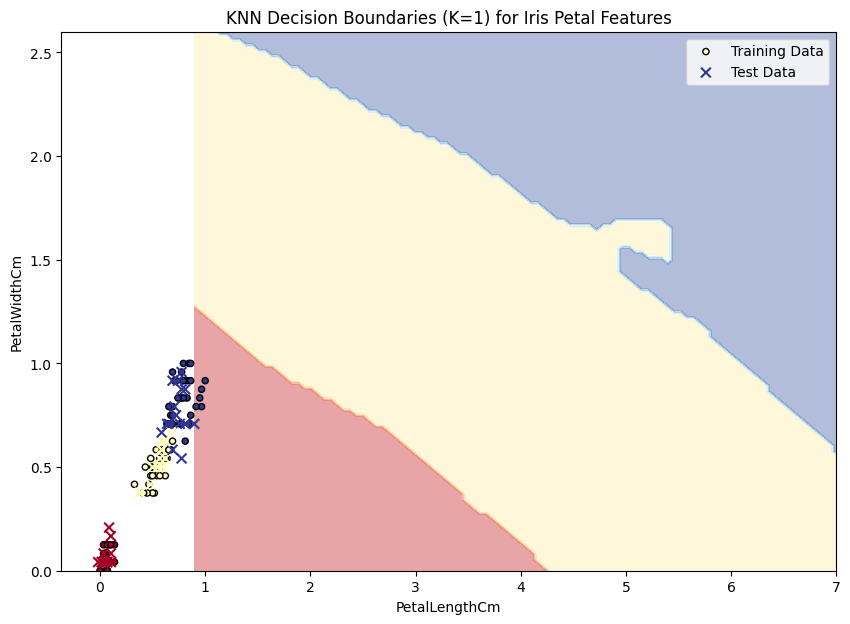


--- Task Complete! ---
Remember to put your code, any plots/screenshots, and a README.md file in a GitHub repository.
The README.md should explain what you did, the steps you followed, and your observations.
Finally, submit the GitHub repo link.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# --- Step 1: Choose a classification dataset and normalize features. ---

# Load the Iris dataset from the provided CSV file
try:
    df = pd.read_csv(r"D:\ML PROJECTS\elevate labs intenship\task6\Iris.csv")
except FileNotFoundError:
    print("Error: 'Iris.csv' not found. Please ensure the file is uploaded correctly.")
    exit()

print("Original Data Head from Iris.csv:")
print(df.head())

# Identify features (X) and target (y)
# Assuming the 'Id' column is not a feature, and 'Species' is the target.
# Features will be 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'
X = df.iloc[:, 1:-1].values # All rows, columns from index 1 up to (but not including) the last one
y_labels = df.iloc[:, -1].values # All rows, only the last column (species names)

# Convert species labels to numerical format for scikit-learn
le = LabelEncoder()
y = le.fit_transform(y_labels)

# Get the target names for better visualization of confusion matrix
target_names = le.classes_
print(f"\nTarget Labels (encoded): {np.unique(y)}")
print(f"Original Target Names: {target_names}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled Data (first 5 rows of training set):")
print(X_train_scaled[:5])

# --- Step 2 & 3: Use KNeighborsClassifier from sklearn and Experiment with different values of K. ---

k_values = range(1, 21, 2) # Experiment with odd K values from 1 to 20
accuracies = []
confusion_matrices = {}

for k in k_values:
    print(f"\n--- Training KNN with K = {k} ---")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # --- Step 4: Evaluate model using accuracy, confusion matrix. ---
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for K={k}: {accuracy:.4f}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[k] = cm
    print(f"Confusion Matrix for K={k}:\n{cm}")

    # Optional: Visualize confusion matrix for each K [image-tag: code-generated-image-11-1749105198935860538] [image-tag: code-generated-image-10-1749105198935859458] [image-tag: code-generated-image-9-1749105198935858158] [image-tag: code-generated-image-8-1749105198935855508] [image-tag: code-generated-image-7-1749105198935854578] [image-tag: code-generated-image-6-1749105198935853788] [image-tag: code-generated-image-5-1749105198935826778] [image-tag: code-generated-image-4-1749105198935824768] [image-tag: code-generated-image-3-1749105198935823638] [image-tag: code-generated-image-2-1749105198935821478]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title(f'Confusion Matrix for K={k}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plotting Accuracy vs. K [image-tag: code-generated-image-1-1749105198935820158]
plt.figure(figsize=(10, 6))
plt.plot(list(k_values), accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

# --- Step 5: Visualize decision boundaries. ---
# For simplicity, let's select two features (e.g., PetalLengthCm and PetalWidthCm) for visualization.
# These correspond to columns at index 3 and 4 in the original DataFrame (after 'Id').
# Or, if we consider X directly, they are at index 2 and 3.

X_2_features = df.iloc[:, [3, 4]].values # PetalLengthCm and PetalWidthCm
y_2_features = y # Use the already encoded y

# Split and scale these two features
X_train_2_f, X_test_2_f, y_train_2_f, y_test_2_f = train_test_split(X_2_features, y_2_features, test_size=0.3, random_state=42, stratify=y_2_features)
scaler_2_f = MinMaxScaler()
X_train_2_f_scaled = scaler_2_f.fit_transform(X_train_2_f)
X_test_2_f_scaled = scaler_2_f.transform(X_test_2_f)

# Choose an optimal K based on your accuracy plot (e.g., if K=1 gave good accuracy)
optimal_k_idx = np.argmax(accuracies)
optimal_k = list(k_values)[optimal_k_idx]
print(f"\nOptimal K based on accuracy plot: {optimal_k}")

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_2_f_scaled, y_train_2_f)

# Create a mesh grid for plotting decision boundaries
# Use min/max values of the original (unscaled) 2 features for mesh grid creation
x_min, x_max = X_2_features[:, 0].min() - 0.1, X_2_features[:, 0].max() + 0.1
y_min, y_max = X_2_features[:, 1].min() - 0.1, X_2_features[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict class for each point in the mesh grid
Z = knn_optimal.predict(scaler_2_f.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary [image-tag: code-generated-image-0-1749105198935814048]
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
# Plot the scaled training data points
plt.scatter(X_train_2_f_scaled[:, 0], X_train_2_f_scaled[:, 1], c=y_train_2_f, s=20, edgecolor='k', cmap=plt.cm.RdYlBu, label='Training Data')
# Plot the scaled test data points (optional, but good for seeing where test points fall)
plt.scatter(X_test_2_f_scaled[:, 0], X_test_2_f_scaled[:, 1], c=y_test_2_f, marker='x', s=50, edgecolor='k', cmap=plt.cm.RdYlBu, label='Test Data')

plt.xlabel(df.columns[3]) # PetalLengthCm
plt.ylabel(df.columns[4]) # PetalWidthCm
plt.title(f'KNN Decision Boundaries (K={optimal_k}) for Iris Petal Features')
plt.legend()
plt.show()

# --- Final thoughts for your README.md ---
print("\n--- Task Complete! ---")
print("Remember to put your code, any plots/screenshots, and a README.md file in a GitHub repository.")
print("The README.md should explain what you did, the steps you followed, and your observations.")
print("Finally, submit the GitHub repo link.")